# Ethiopian Supermarket Customer Segmentation Analysis

This notebook contains a complete customer segmentation analysis using K-Means clustering.

**Dataset:** Ethiopian Supermarket Customers  
**Method:** K-Means Clustering  
**Features:** Age, Income, Spending Score, Gender, Membership, Visit Frequency

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully!')

Libraries imported successfully!


## 2. Load and Preview Data

In [2]:
# Load customer data
df = pd.read_csv('sample_data/ethiopian_supermarket_customers.csv')

print(f'Dataset loaded successfully!')
print(f'Shape: {df.shape}')
print(f'\nColumns: {list(df.columns)}')
print(f'\nMissing values: {df.isnull().sum().sum()}')

df.head(10)

Dataset loaded successfully!
Shape: (50, 8)

Columns: ['customer_id', 'age', 'annual_income', 'spending_score', 'gender', 'region', 'membership_tier', 'visit_frequency']

Missing values: 0


,customer_id,age,annual_income,spending_score,gender,region,membership_tier,visit_frequency
0,1,25,45000,65,Male,Addis Ababa,Gold,Weekly
1,2,32,78000,82,Female,Dire Dawa,Platinum,Daily
2,3,45,52000,45,Male,Hawassa,Silver,Monthly
3,4,28,61000,73,Female,Bahir Dar,Gold,Weekly
4,5,56,89000,38,Male,Mekelle,Platinum,Weekly
5,6,23,32000,78,Female,Addis Ababa,Bronze,Daily
6,7,41,67000,55,Male,Gondar,Gold,Weekly
7,8,35,55000,68,Female,Jimma,Silver,Weekly
8,9,48,95000,42,Male,Addis Ababa,Platinum,Monthly
9,10,29,48000,85,Female,Adama,Gold,Daily


### Dataset Statistics

In [3]:
# Display dataset statistics
df.describe()

,customer_id,age,annual_income,spending_score
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,38.020000,64160.000000,60.82000
std,14.57738,10.580093,20969.715773,18.39553
min,1.00000,22.000000,28000.000000,31.00000
25%,13.25000,29.000000,48250.000000,43.25000
50%,25.50000,36.500000,61500.000000,64.50000
75%,37.75000,46.750000,81000.000000,75.75000
max,50.00000,58.000000,105000.000000,92.00000


## 3. Data Exploration & Visualization

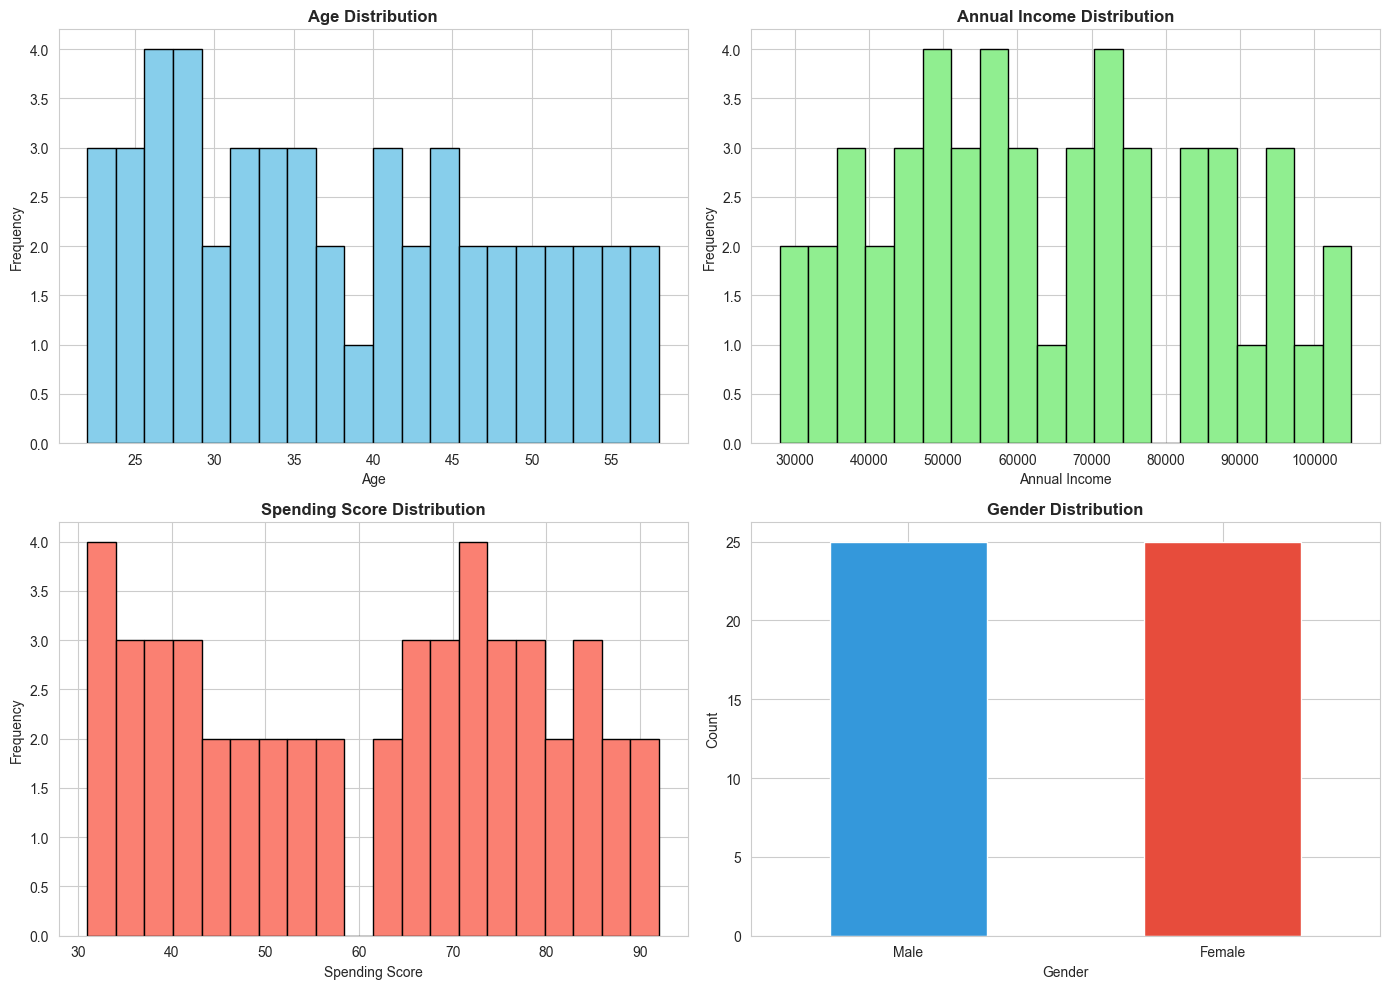

In [4]:
# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df['age'].hist(bins=20, ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

df['annual_income'].hist(bins=20, ax=axes[0,1], color='lightgreen', edgecolor='black')
axes[0,1].set_title('Annual Income Distribution', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Annual Income')
axes[0,1].set_ylabel('Frequency')

df['spending_score'].hist(bins=20, ax=axes[1,0], color='salmon', edgecolor='black')
axes[1,0].set_title('Spending Score Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Spending Score')
axes[1,0].set_ylabel('Frequency')

df['gender'].value_counts().plot(kind='bar', ax=axes[1,1], color=['#3498db', '#e74c3c'])
axes[1,1].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Regional Distribution

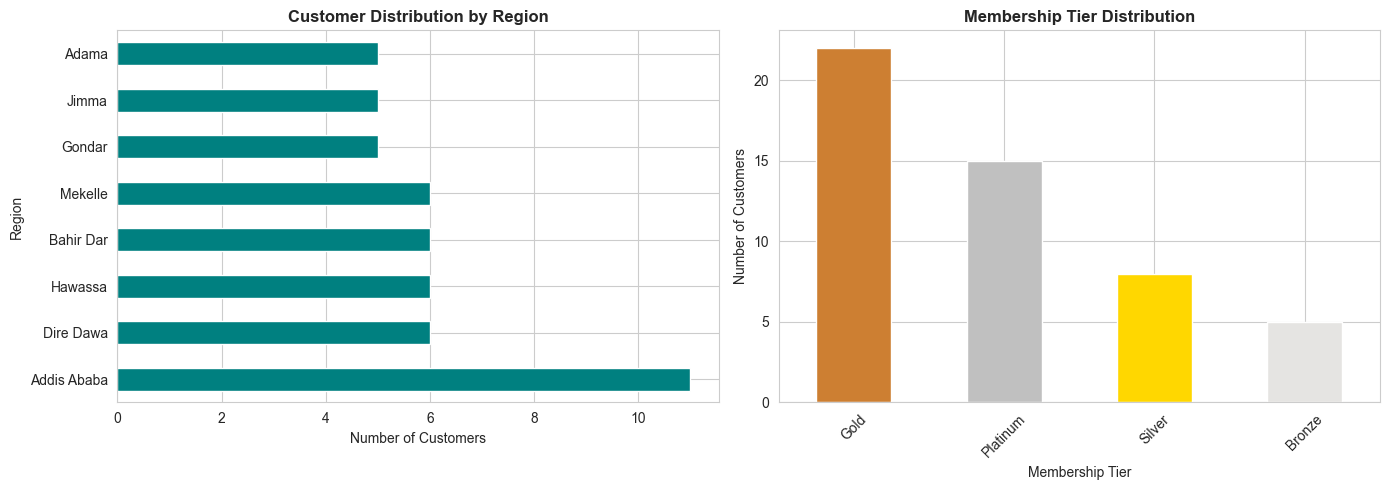

In [5]:
# Regional and membership analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['region'].value_counts().plot(kind='barh', ax=axes[0], color='teal')
axes[0].set_title('Customer Distribution by Region', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Customers')
axes[0].set_ylabel('Region')

df['membership_tier'].value_counts().plot(kind='bar', ax=axes[1], 
                                           color=['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2'])
axes[1].set_title('Membership Tier Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Membership Tier')
axes[1].set_ylabel('Number of Customers')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Feature Correlation Analysis

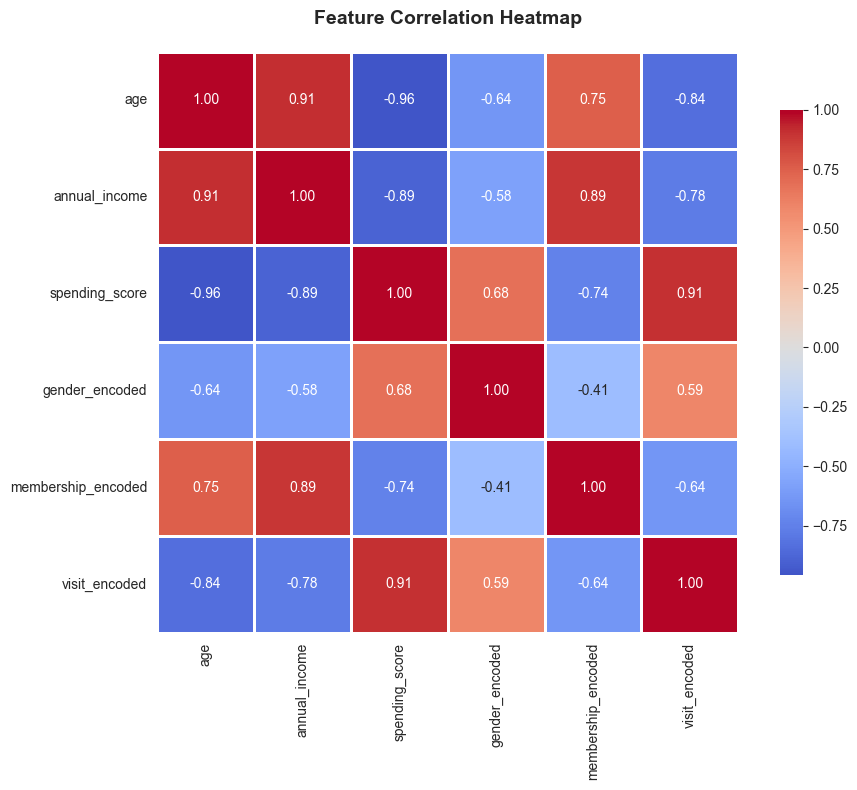

In [6]:
# Encode categorical variables for correlation analysis
df_encoded = df.copy()
df_encoded['gender_encoded'] = df_encoded['gender'].map({'Male': 0, 'Female': 1})
df_encoded['region_encoded'] = pd.factorize(df_encoded['region'])[0]
df_encoded['membership_encoded'] = df_encoded['membership_tier'].map(
    {'Bronze': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})
df_encoded['visit_encoded'] = df_encoded['visit_frequency'].map(
    {'Monthly': 0, 'Weekly': 1, 'Daily': 2})

# Correlation heatmap
plt.figure(figsize=(10, 8))
features_for_corr = ['age', 'annual_income', 'spending_score', 
                     'gender_encoded', 'membership_encoded', 'visit_encoded']
correlation = df_encoded[features_for_corr].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 5. Data Preprocessing & Scaling

In [7]:
# Prepare features for clustering
features = ['age', 'annual_income', 'spending_score', 
            'gender_encoded', 'membership_encoded', 'visit_encoded']
X = df_encoded[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f'Features scaled successfully!')
print(f'Scaled data shape: {X_scaled.shape}')

Features scaled successfully!
Scaled data shape: (50, 6)


## 6. Determine Optimal Number of Clusters (Elbow Method)

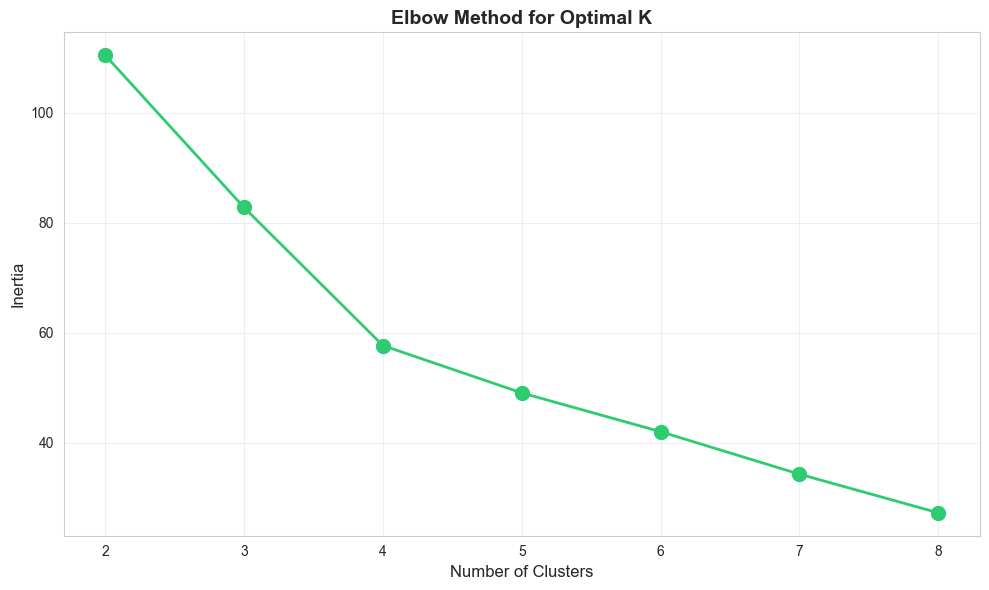


Based on the elbow curve, optimal k appears to be around 4


In [8]:
# Elbow method
inertias = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=10, color='#2ecc71')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('\nBased on the elbow curve, optimal k appears to be around 4')

## 7. Apply K-Means Clustering

Customers segmented into 4 clusters!

Cluster Distribution:


Cluster
0     8
1    11
2    16
3    15
Name: count, dtype: int64


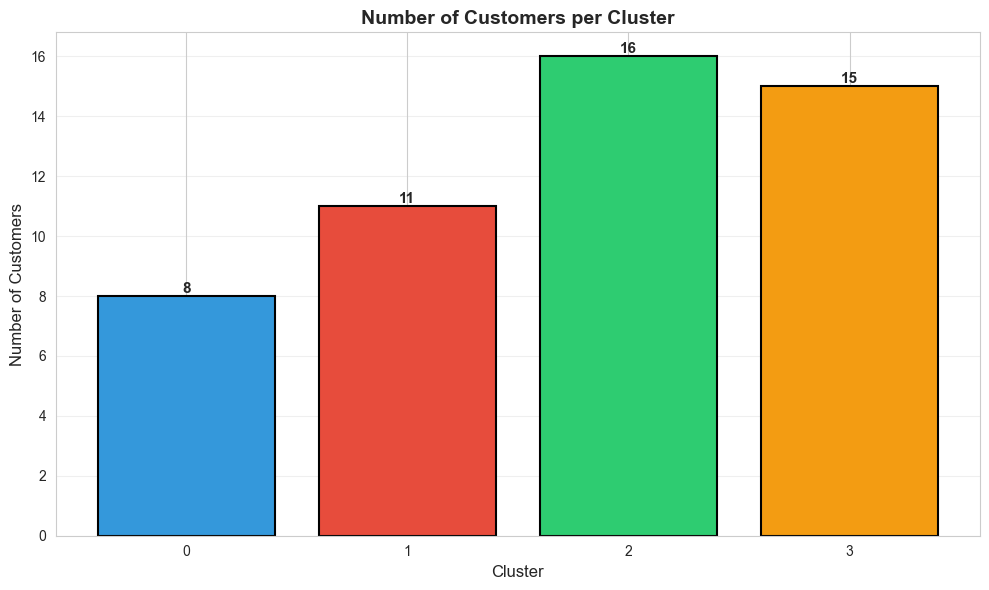

In [9]:
# Apply K-Means with 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f'Customers segmented into {optimal_k} clusters!')
print(f'\nCluster Distribution:')
print(df['Cluster'].value_counts().sort_index())

# Visualize cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts = df['Cluster'].value_counts().sort_index()
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Number of Customers per Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(cluster_counts.index)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 8. Visualize Customer Segments (PCA)

Explained variance ratio: [0.79700007 0.10745872]
Total variance explained: 90.45%


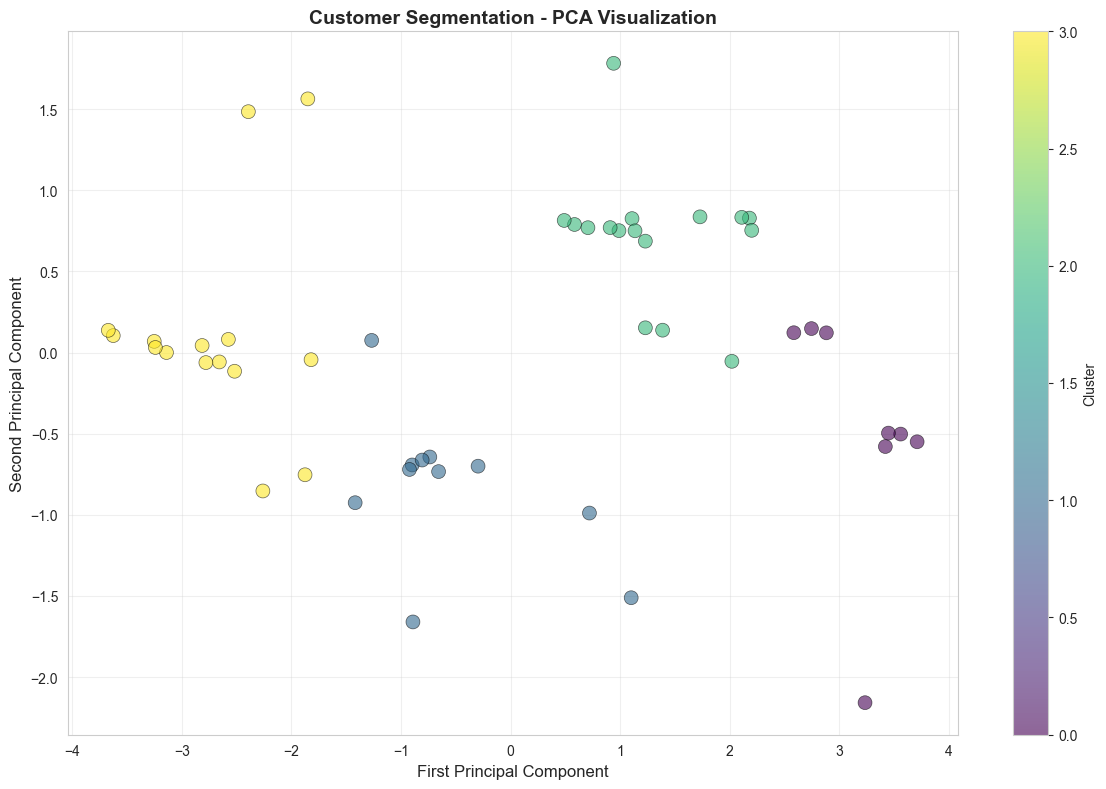

In [10]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Total variance explained: {pca.explained_variance_ratio_.sum():.2%}')

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis',
                     alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Customer Segmentation - PCA Visualization', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Analyze Cluster Characteristics

In [11]:
# Detailed cluster analysis
cluster_summary = df.groupby('Cluster')[['age', 'annual_income', 'spending_score']].mean()
print('\nCluster Characteristics (Averages):\n')
print(cluster_summary.round(2))
cluster_summary


Cluster Characteristics (Averages):

           age  annual_income  spending_score
Cluster                                      
0        24.62       35500.00           84.38
1        38.91       64818.18           56.36
2        31.88       54562.50           73.25
3        51.07       89200.00           38.27


,age,annual_income,spending_score
Cluster,,,
0,24.625000,35500.000000,84.375000
1,38.909091,64818.181818,56.363636
2,31.875000,54562.500000,73.250000
3,51.066667,89200.000000,38.266667


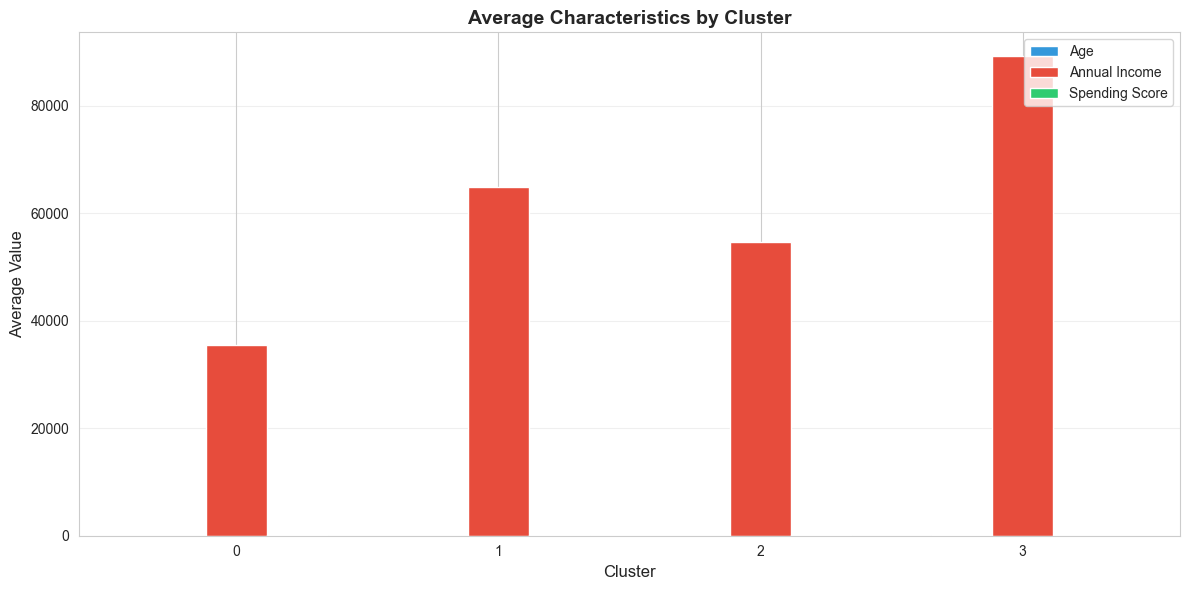

In [12]:
# Visualize cluster characteristics
fig, ax = plt.subplots(figsize=(12, 6))
cluster_summary.plot(kind='bar', ax=ax, width=0.7, 
                    color=['#3498db', '#e74c3c', '#2ecc71'])
ax.set_title('Average Characteristics by Cluster', fontsize=14, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.legend(['Age', 'Annual Income', 'Spending Score'], loc='upper right', fontsize=10)
ax.tick_params(axis='x', rotation=0)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Cluster Profiles by Demographics

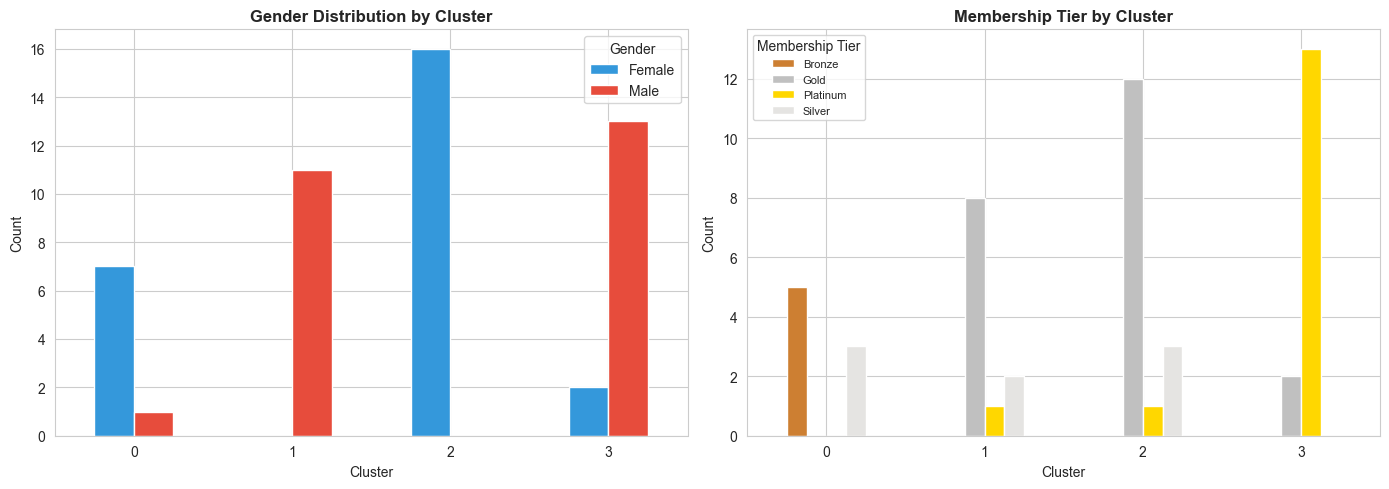

In [13]:
# Gender and membership distribution by cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender distribution by cluster
gender_cluster = pd.crosstab(df['Cluster'], df['gender'])
gender_cluster.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Gender Distribution by Cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Gender')

# Membership tier distribution by cluster
membership_cluster = pd.crosstab(df['Cluster'], df['membership_tier'])
membership_cluster.plot(kind='bar', ax=axes[1], 
                       color=['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2'])
axes[1].set_title('Membership Tier by Cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Membership Tier', fontsize=8)

plt.tight_layout()
plt.show()

## 10. Conclusions and Business Insights

### Cluster Interpretations:

Based on the segmentation analysis, we have identified 4 distinct customer groups:

**Interpretation Guidelines:**
- Analyze average age, income, and spending scores
- Consider membership tiers and visit frequency
- Identify high-value vs potential growth segments

### Recommended Actions:

1. **High-Value Customers**: Target with premium products, exclusive events, and VIP services
2. **Growth Potential**: Engage with personalized promotions and loyalty programs
3. **Budget-Conscious**: Offer value bundles, discounts, and volume deals
4. **Occasional Shoppers**: Re-engagement campaigns and special incentives

### Next Steps:

- Implement segment-specific marketing strategies
- Monitor cluster evolution quarterly
- A/B test different approaches per segment
- Integrate insights into CRM and POS systems
- Track ROI of segment-based campaigns

---
**Analysis Complete**